<h1>Custom algorithm to quantify edge cases like the yellow color infection pattern</h1>

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


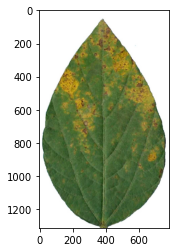

In [2]:
#reading the image
imgNo=50

imgPath='/home/aahan/Documents/Minor Project/06-soybean_rust/originals/F{}.jpg'.format(imgNo)
image=cv2.cvtColor(cv2.imread(imgPath),cv2.COLOR_BGR2RGB)

# resImg=[]
# for pixel in image.reshape(-1,3):
#     r,g,b=pixel[0]|,pixel[1],pixel[2]
#     if r==0 and g==0 and b==0:
#         resImg.append([255,255,255])
#     else:
#         resImg.append(pixel)
# image=np.array(resImg,dtype=np.uint8).reshape(image.shape)
        

plt.imshow(image)

image=cv2.cvtColor(image,cv2.COLOR_RGB2LAB)

l,a,b=cv2.split(image)

l,a,b=(l.flatten(),a.flatten(),b.flatten())




<h2>Segmentation from background</h2>

(1313, 782, 2)
(1313, 782, 3)
630419


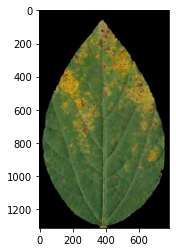

In [3]:
#create a vector containing a*b* channel
shape=image.shape

vector=image[:,:,1:]
print(vector.shape)
vector=vector.reshape(-1,2)

#convert to float32
vector=np.float32(vector)

#criteria
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
K=5
attempts=10
ret,label,center=cv2.kmeans(vector,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

# print(label)

center=np.uint8(center)
res=center[label.flatten()]

resArr=[]
for ele in res:
    a,b=ele[0],ele[1]
    resArr.append([90,a,b])
resArr=np.array(resArr,dtype=np.uint8)
resArr=resArr.reshape(shape)
print(resArr.shape)


# rtArr=cv2.cvtColor(resArr,cv2.COLOR_LAB2RGB)
# plt.imshow(rtArr)
a_channel=resArr[:,:,1]
b_channel=resArr[:,:,2]
# plt.imshow(b_channel,cmap="gray")
# hist,bins,_=plt.hist(a_channel.flatten(),bins=256,range=(0,256))
# plt.show()
minVal=np.amin(b_channel)

#segmenting the background from the original image
resImg=[]
image=cv2.cvtColor(cv2.imread(imgPath),cv2.COLOR_BGR2RGB)
#will also count total pixels
totalPixels=0

for ele1,ele2 in zip(resArr.reshape(-1,3),image.reshape(-1,3)):
    b=ele1[2]
    if b==minVal:
        resImg.append([0,0,0])
    else:
        resImg.append([ele2[0],ele2[1],ele2[2]])
resImg=np.array(resImg,dtype=np.uint8).reshape(image.shape)

image=np.copy(resImg)
plt.imshow(image)
resImg=None
resArr=None

totalPixels=0
for ele in image.reshape(-1,3):
    if ele[0]==0 and ele[1]==0 and ele[2]==0:
        continue
    totalPixels+=1

image=cv2.cvtColor(image,cv2.COLOR_RGB2LAB)

l,a,b=cv2.split(image)

l,a,b=(l.flatten(),a.flatten(),b.flatten())
print(totalPixels)


<h1> K-means Clustering Start</h1>

<h2>Elbow Method</h2>

In [4]:
# vector=image[:,:,1:]
# vector=vector.reshape(-1,2)

# distortions=[]
# mappings={}

# K_range=range(1,10)

# for k in K_range:
#     kmean=KMeans(n_clusters=k).fit(vector)
#     kmean.fit(vector)
#     distortions.append(sum(np.min(cdist(vector, kmean.cluster_centers_,'euclidean'), axis=1)) / vector.shape[0])
#     mappings[k] = sum(np.min(cdist(vector, kmean.cluster_centers_,'euclidean'), axis=1)) / vector.shape[0]

# plt.plot(K_range, distortions)
# plt.xlabel('Values of K')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method using Distortion')
# plt.show()

(1313, 782, 2)
(1313, 782, 3)


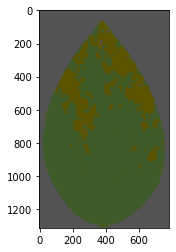

In [5]:
#create a vector containing a*b* channel
shape=image.shape

vector=image[:,:,1:]
print(vector.shape)
vector=vector.reshape(-1,2)

#convert to float32
vector=np.float32(vector)

#criteria
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
K=3
attempts=10
ret,label,center=cv2.kmeans(vector,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

# print(label)

center=np.uint8(center)
res=center[label.flatten()]

resArr=[]
for ele in res:
    a,b=ele[0],ele[1]
    resArr.append([90,a,b])
resArr=np.array(resArr,dtype=np.uint8)
resArr=resArr.reshape(shape)
print(resArr.shape)


rtArr=cv2.cvtColor(resArr,cv2.COLOR_LAB2RGB)
plt.imshow(rtArr)


<h1>Segmenting the image based on color</h1>

<h3>a channel</h3>

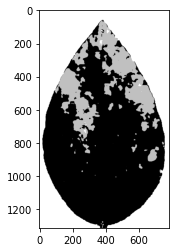

In [6]:
rows,cols,_=resArr.shape
a_channel=resArr[:,:,1]
b_channel=resArr[:,:,2]

# plt.imshow(a_channel,cmap='gray')
plt.imshow(a_channel,cmap='gray')


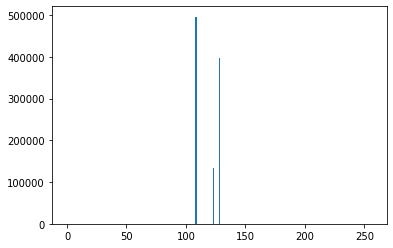

In [7]:
hist,bins,_=plt.hist(a_channel.flatten(),bins=256,range=(0,256))
plt.show()

In [8]:
#extracting the black color
#since in grayscale,the lowest value is the darkest
minVal=np.amin(a_channel)
print(minVal)

maxVal=np.amax(b_channel)
print(maxVal)

108
171


<h3>Segment the image based on the minimum value</h3>

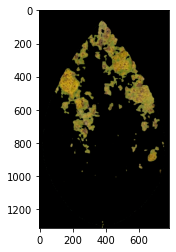

In [9]:
resImg=[]
image=cv2.cvtColor(image,cv2.COLOR_LAB2RGB)
#will also count total pixels


for ele1,ele2 in zip(resArr.reshape(-1,3),image.reshape(-1,3)):
    a=ele1[1]
    if a==minVal:
        resImg.append([0,0,0])
    else:
        resImg.append([ele2[0],ele2[1],ele2[2]])
resImg=np.array(resImg,dtype=np.uint8).reshape(image.shape)
plt.imshow(resImg)





<h2>Quantification Process on the segmented k-means results</h2>

In [10]:
#calculating the total diseased pixels
totalDiseased=0

for ele in resImg.reshape(-1,3):
    r,g,b=ele[0],ele[1],ele[2]
    if r!=0 and g!=0 and b!=0:
        totalDiseased+=1
print(totalDiseased)
print(totalPixels)

fraction=totalDiseased/totalPixels
print(fraction*100)


134062
630419
21.265539268327892
